## BY: ALIMI AFEEZ OLALEKAN

##  Exploratory Data Analysis (EDA) on Retail Sales Data

In [1]:
#Importing Library
import pandas as pd
import numpy as np

#Importing the dataset
data_path = "C:/Users/Alimi Nimotalahi/Desktop/Oasis Infobyte/Retail Sales Dataset/retail_sales_dataset.csv"
#print(data_path)
data = pd.read_csv(data_path)
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
#row and column of the dataset
data.shape

(1000, 9)

In [3]:
#get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
#describe the data based on statistical analysis
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
#Check for duplicate
data.duplicated().sum()

0

## COMMENT
#1. NO DUPLICATE IN THE DATASET

#2. NO NULL VALUES IN THE DATASET

#3. Customer age ranges from 18 to 64 with an average of around 41 years.

#4. Most customers buy between 1 and 4 items (product quantity).

#5. There is high variability in the price per unit and total transaction amount.

# •	How does customer age and gender influence their purchasing behavior?

In [6]:
data["Age"].corr(data["Total Amount"]) #NO CORRELATION BETWEEN AGE AND TOTAL AMOUNT SPENT

-0.060568023883045635

In [7]:
age_to_gender_purchasing_behaviour = data.groupby(["Age", "Gender"])["Total Amount"].sum()
age_to_gender_purchasing_behaviour

Age  Gender
18   Female    7940
     Male      3275
19   Female    7335
     Male      7535
20   Female    5175
               ... 
62   Male      5060
63   Female    1205
     Male      8045
64   Female    6325
     Male      2800
Name: Total Amount, Length: 94, dtype: int64

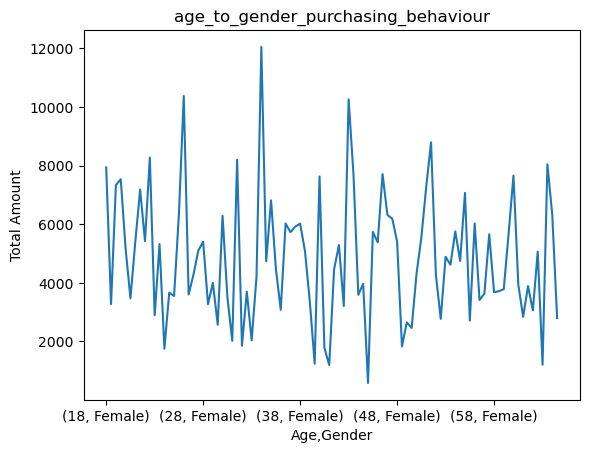

In [8]:
import matplotlib.pyplot as plt
age_to_gender_purchasing_behaviour.plot(kind = "line")
plt.title("age_to_gender_purchasing_behaviour")
plt.ylabel("Total Amount")
plt.show()

In [9]:
# Reset index to make Age and Gender columns accessible
age_to_gender_purchasing_behaviour = age_to_gender_purchasing_behaviour.reset_index()

# Sort by Age in ascending order
age_to_gender_purchasing_behaviour = age_to_gender_purchasing_behaviour.sort_values(by='Age')

In [10]:
age_to_gender_purchasing_behaviour

,Age,Gender,Total Amount
0,18,Female,7940
1,18,Male,3275
2,19,Female,7335
3,19,Male,7535
4,20,Female,5175
...,...,...,...
89,62,Male,5060
90,63,Female,1205
91,63,Male,8045
92,64,Female,6325


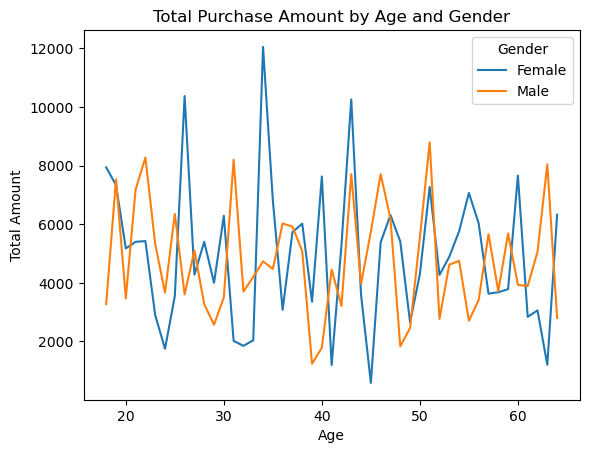

In [11]:
# Plotting a line chart
for gender in age_to_gender_purchasing_behaviour['Gender'].unique():
    subset = age_to_gender_purchasing_behaviour[age_to_gender_purchasing_behaviour['Gender'] == gender]
    plt.plot(subset['Age'], subset['Total Amount'], label=gender)

# Customize the plot
plt.title('Total Purchase Amount by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.grid(False)
plt.show()

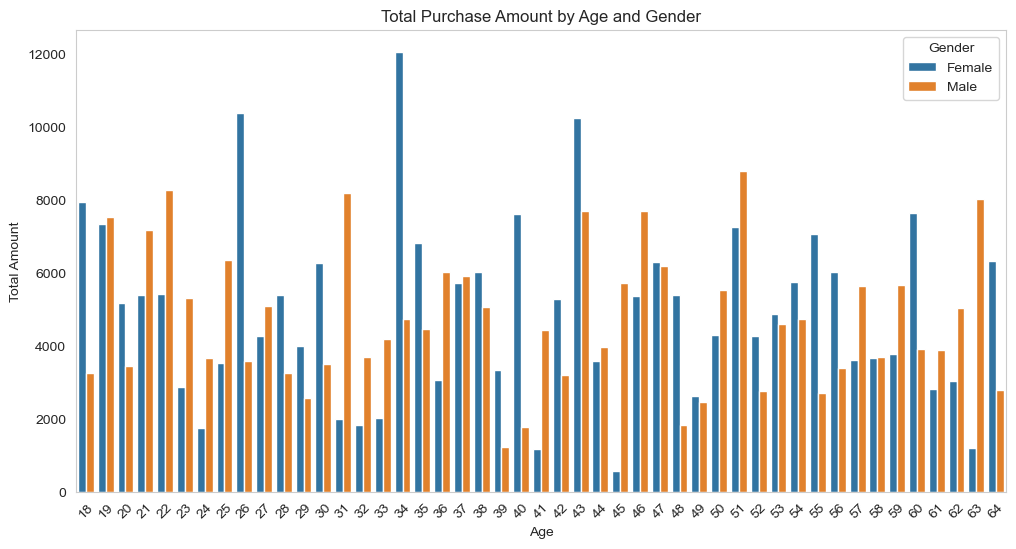

In [12]:
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Total Amount', hue='Gender', data=age_to_gender_purchasing_behaviour)

# Customize labels and title
plt.title('Total Purchase Amount by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate age labels for better visibility
plt.grid(False)
plt.show()

# COMMENT

#1. IT IS SEEN THAT FEMALE WITHIN THE AGE RANGE OF 25 TO 40 HAVE HIGH PURCHASING POWER THAN MALE.

# •	Are there discernible patterns in sales across different time periods?

In [13]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [14]:
type(data["Date"][0]) #NEED TO BE CONVERTED TO DATETIME

str

In [15]:
from datetime import datetime
# Convert date column to datetime format
data["Date"] = pd.to_datetime(data["Date"], format= "%Y-%m-%d")

In [16]:
type(data["Date"][0]) 

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [18]:
data["Date"][0]

Timestamp('2023-11-24 00:00:00')

In [19]:
total_sales_per_date = data.groupby("Date")["Total Amount"].sum()
total_sales_per_date

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64

In [20]:
data["Date"].unique().month

array([11,  2,  1,  5,  5,  4,  3,  2, 12, 10,  2, 10,  8,  1,  1,  2,  4,
        4,  9, 11,  1, 10,  4, 11, 12,  8,  4,  8, 10,  5,  1,  3, 12,  6,
        3,  4,  6,  7,  2,  7,  6, 11,  5,  1,  8, 10,  3,  7,  2, 10,  5,
       11, 11,  7, 10,  4, 12,  2,  1, 12,  4,  5,  2,  8, 11,  7,  3,  7,
        7,  4, 12,  5, 12, 11,  2, 11,  3, 10,  8,  5, 12, 10, 12,  6,  1,
        4,  6,  7,  5,  2,  4, 10, 12,  9,  7, 11,  8,  3,  5, 10,  5, 10,
        8, 10,  7,  3,  9,  9,  2,  1,  2,  3, 12, 11,  2,  7,  7,  8,  9,
        5, 10,  1,  2, 11,  8,  3,  1,  9,  4,  9,  2, 11,  6,  7,  3, 10,
        9,  1, 11,  6,  9,  1,  6,  5,  1,  5,  2,  9,  9,  3,  3, 12,  9,
       10,  3, 11, 12,  4,  1,  6,  8,  9,  8,  3,  4,  6,  1, 12, 11,  1,
        2,  6,  9,  5, 12,  4,  3, 10,  8,  5,  7,  4,  2,  8,  7,  1, 12,
       12, 11,  2,  2,  7,  2,  5,  4,  2,  8,  1, 11,  1,  3,  9,  7,  5,
       12, 10,  9,  6, 10, 10,  6,  9,  9,  2,  4, 11, 12,  5, 10,  1, 11,
       12, 10,  9,  5,  4

In [21]:
data["Date"].unique().year

array([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 20

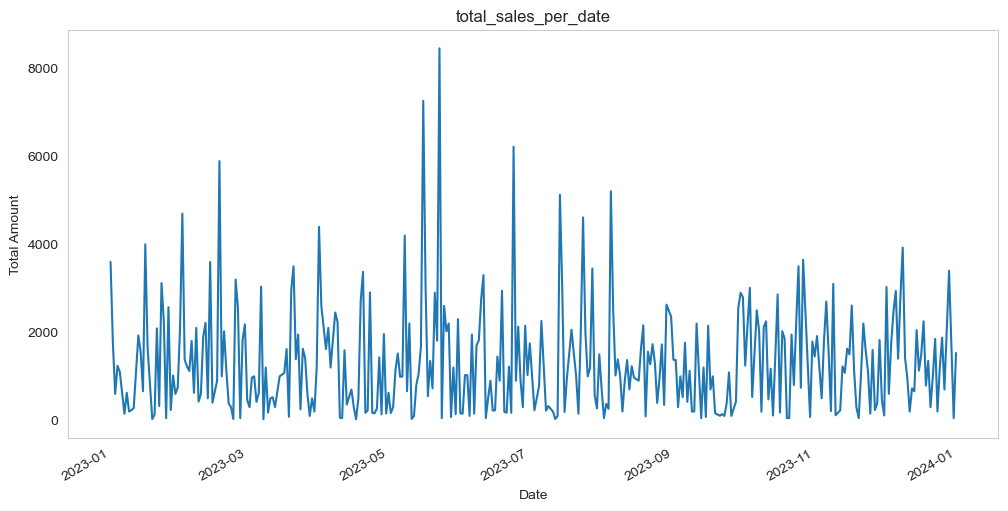

In [22]:
plt.figure(figsize= (12,6))
total_sales_per_date.plot(kind = "line")
plt.title("total_sales_per_date")
plt.ylabel("Total Amount")
plt.grid(False)
plt.show()

# COMMENT

#1. IT IS SEEN THAT THERE IS EVEN TREND IN SALES PER DATE. FROM THE LINE CHART, THERE IS MORE SALES BETWEEN THE FIFTH MONTH AND NINETH MONTH.

# •	Which product categories hold the highest appeal among customers?

In [23]:
data.head(8)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100


In [24]:
#unique Product Category
data["Product Category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [25]:
#Get the highest product quantity per Unit Price
product_with_highest_customer_max = data.groupby("Product Category").max()
product_with_highest_customer_max

,Transaction ID,Date,Customer ID,Gender,Age,Quantity,Price per Unit,Total Amount
Product Category,,,,,,,,
Beauty,998,2024-01-01,CUST998,Male,64,4,500,2000
Clothing,996,2023-12-28,CUST996,Male,64,4,500,2000
Electronics,1000,2024-01-01,CUST999,Male,64,4,500,2000


In [26]:
data[data["Quantity"]==4].max()

Transaction ID                     1000
Date                2023-12-29 00:00:00
Customer ID                     CUST998
Gender                             Male
Age                                  64
Product Category            Electronics
Quantity                              4
Price per Unit                      500
Total Amount                       2000
dtype: object

In [27]:
#Get the highest product quantity per Unit Price
product_with_highest_customer_per_sales = data.groupby("Product Category")["Total Amount"].sum()
product_with_highest_customer_per_sales

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

Text(0, 0.5, 'Total Amount')

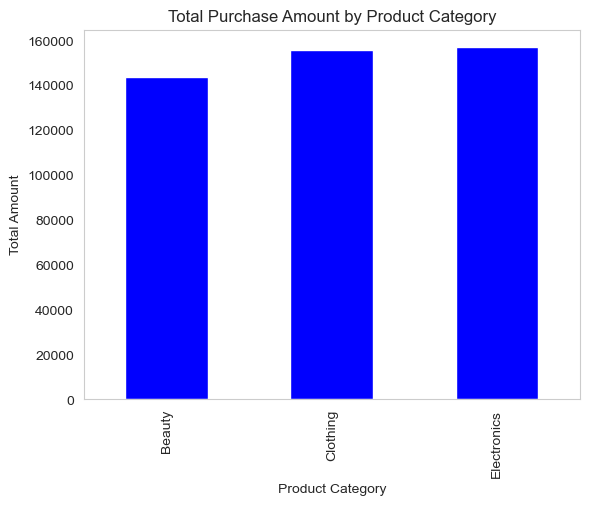

In [28]:
product_with_highest_customer_per_sales.plot(kind= "bar", color= "blue", grid= False)

plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')

<Axes: >

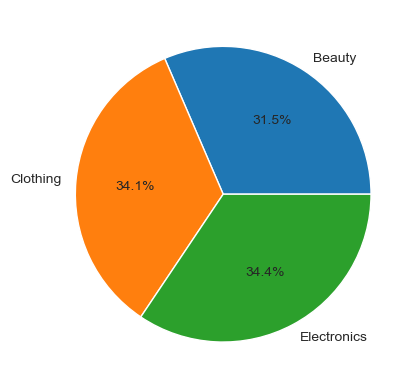

In [29]:
product_with_highest_customer_per_sales.plot(kind= "pie", autopct= "%1.1f%%", ylabel = "")

# COMMENT

#1. IT SHOWS THAT PRODUCT CATEGORY == "Electronics" HAVE THE HIGHEST CUSTOMER PURCHASE POWER.

# •	What are the relationships between age, spending, and product preferences?

In [30]:
data.head(8)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100


In [31]:
age_to_product_category_behaviour = data.groupby(["Age", "Product Category"])["Total Amount"].sum().reset_index()
age_to_product_category_behaviour

,Age,Product Category,Total Amount
0,18,Beauty,4960
1,18,Clothing,4085
2,18,Electronics,2170
3,19,Beauty,4365
4,19,Clothing,2730
...,...,...,...
136,63,Clothing,2470
137,63,Electronics,6625
138,64,Beauty,2330
139,64,Clothing,5555


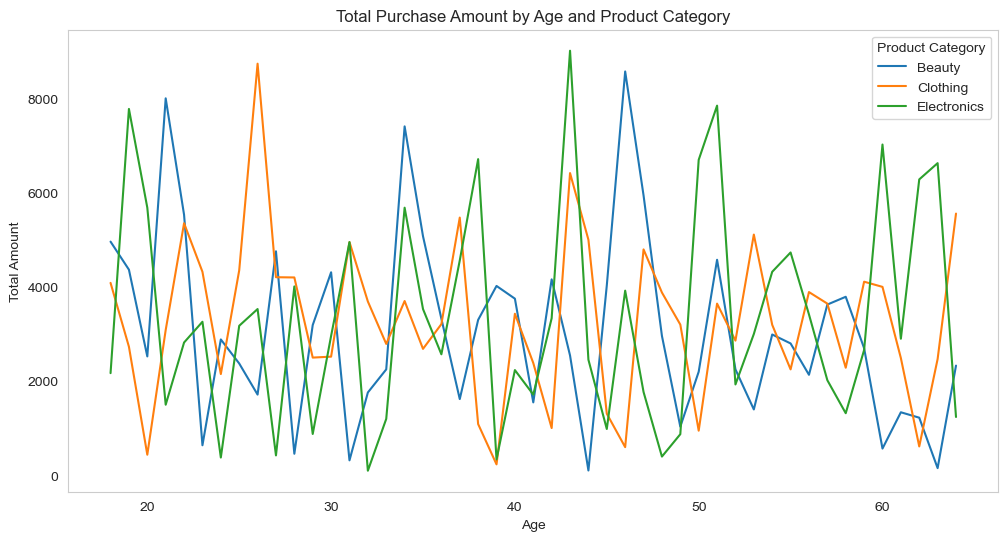

In [32]:
# Plotting a line chart
plt.figure(figsize=(12, 6))
for product in age_to_product_category_behaviour['Product Category'].unique():
    subset = age_to_product_category_behaviour[age_to_product_category_behaviour['Product Category'] == product]
    plt.plot(subset['Age'], subset['Total Amount'], label=product)

# Customize the plot
plt.title('Total Purchase Amount by Age and Product Category')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.grid(False)
plt.show()

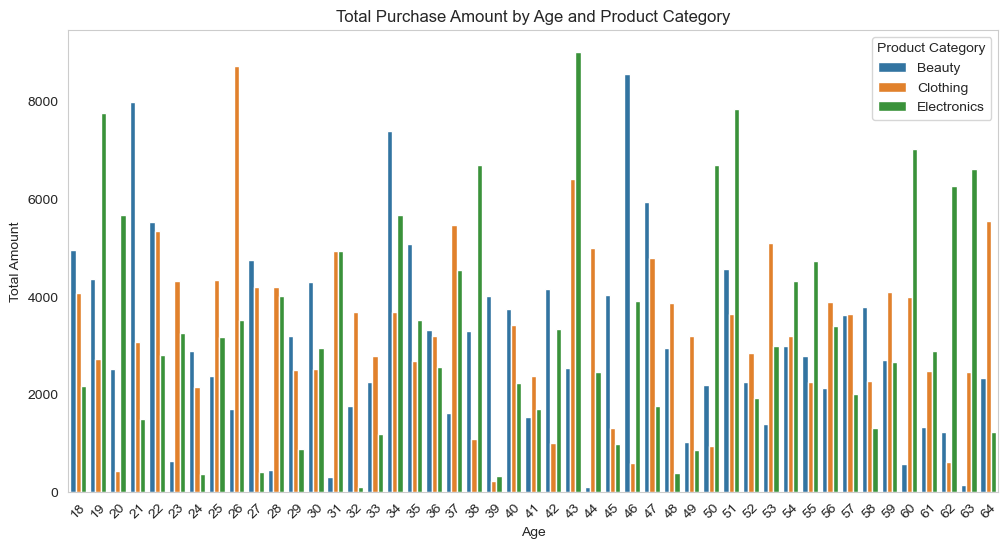

In [33]:
# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Total Amount', hue='Product Category', data=age_to_product_category_behaviour)

# Customize labels and title
plt.title('Total Purchase Amount by Age and Product Category')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Product Category')
plt.xticks(rotation=45)  # Rotate age labels for better visibility

plt.grid(False)
plt.show()

# COMMENT

WITHOUT GENDER BIASED,

IT IS DENOTED THAT CUSTOMER AT AGE 43 PURCHASE MORE OF ELECTRONICS PRODUCTS.

IT IS DENOTED THAT CUSTOMER AT AGE 26 PURCHASE MORE OF CLOTHINGS PRODUCTS.

IT IS DENOTED THAT CUSTOMER AT AGE 46 PURCHASE MORE OF BEAUTY PRODUCTS.

Text(0, 0.5, 'Total Amount')

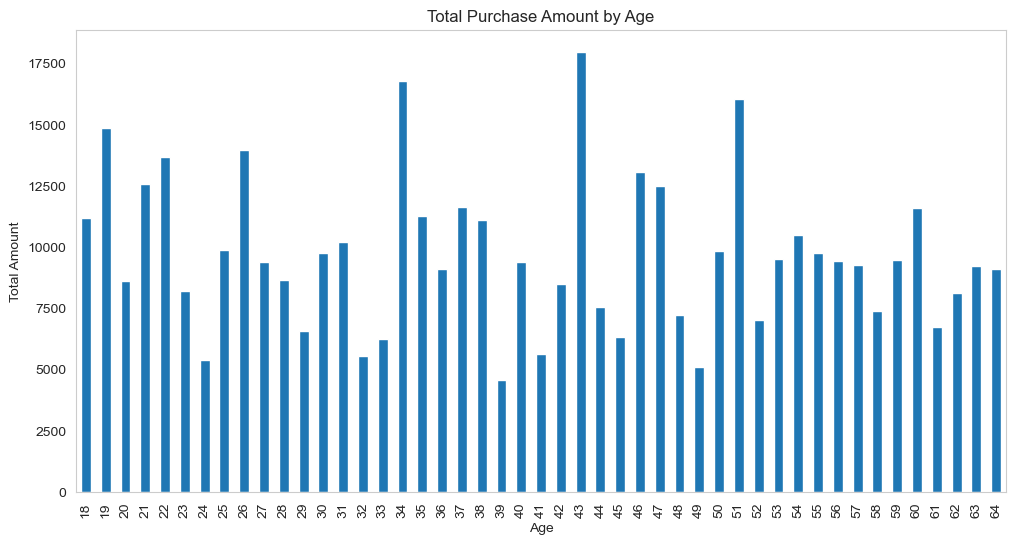

In [34]:
# age_total_amount
plt.figure(figsize=(12, 6))
age_total_amount  = data.groupby("Age")["Total Amount"].sum()
age_total_amount.plot(kind= "bar", grid= False)

plt.title('Total Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Amount')

# COMMENT

IT IS DENOTED THAT CUSTOMER AT AGE 43 HAVE MORE PURCHASE VALUE OF 17,500.

# •	How do customers adapt their shopping habits during seasonal trends?

In [35]:
#SEAONAL TREND BASED ON MONTHLY AND QUARTERLY TRENDS

#Extract year from date
data["Year"] = data["Date"].dt.year

#Extract months from date
data["Month"] = data["Date"].dt.month

#Extract quarterly from date
data["Quarter"] = data["Date"].dt.quarter

In [36]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,2


In [37]:
data["Year"].unique()

array([2023, 2024])

In [38]:
data["Month"].unique()

array([11,  2,  1,  5,  4,  3, 12, 10,  8,  9,  6,  7])

In [39]:
#monthly trends
monthly_trend = data.groupby("Month")["Total Amount"].sum().reset_index()
monthly_trend

,Month,Total Amount
0,1,36980
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


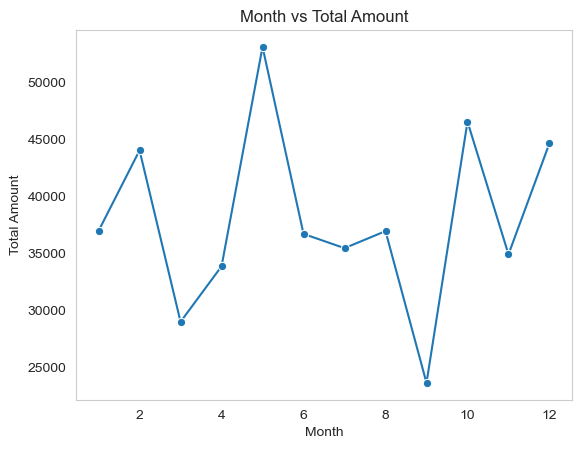

In [40]:
sns.lineplot(x= "Month", y= "Total Amount", data=monthly_trend, marker= "o")

plt.title("Month vs Total Amount")
plt.grid()

# COMMENT
FROM THE CGART, THERE IS MORE SALES AT 5TH MONTH THAN OTHERS.

In [41]:
#quarterly trends
quarterly_trend = data.groupby("Quarter")["Total Amount"].sum().reset_index()
quarterly_trend

,Quarter,Total Amount
0,1,110030
1,2,123735
2,3,96045
3,4,126190


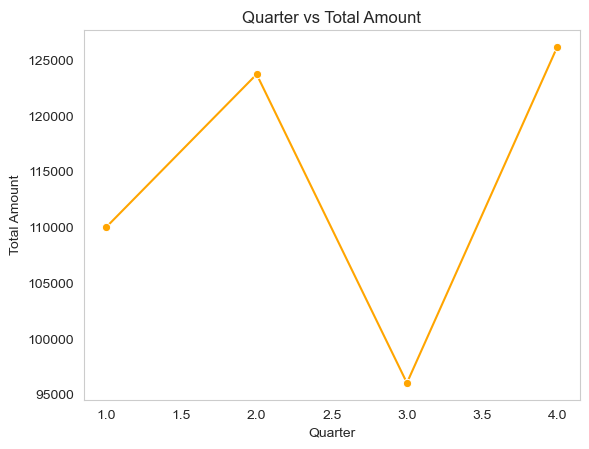

In [42]:
sns.lineplot(x= "Quarter", y= "Total Amount", data=quarterly_trend, color= "orange", marker= "o")

plt.title("Quarter vs Total Amount")
plt.grid()

# COMMENT

THERE IS CLOSE RANGE IN SALES, FOR BOTH 2ND AND 4TH QUARTER OF THE YEAR.

# •	Are there distinct purchasing behaviors based on the number of items bought per transaction?

Text(0, 0.5, 'Total Amount')

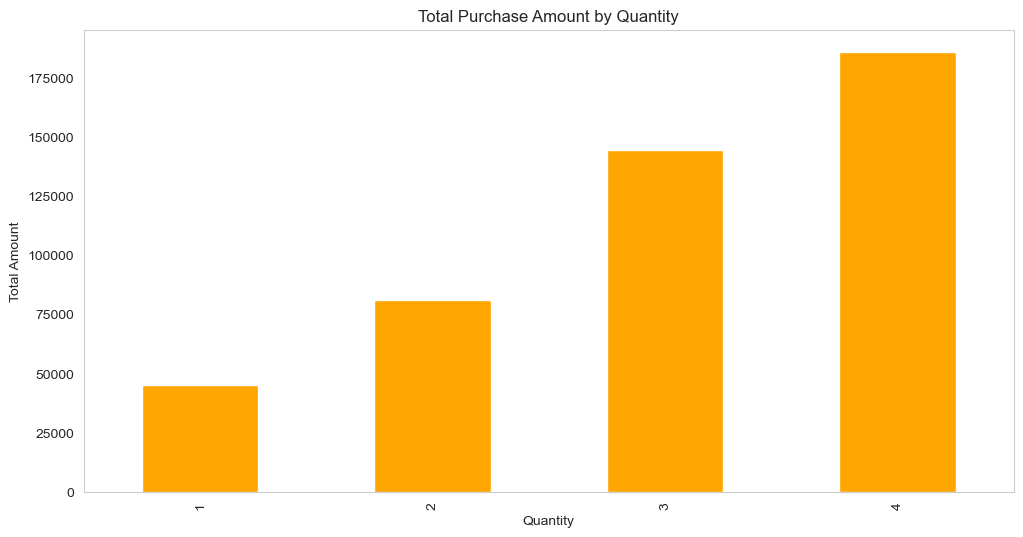

In [43]:
plt.figure(figsize=(12, 6))
quantity_to_purchasing_behaviour = data.groupby("Quantity")["Total Amount"].sum()
quantity_to_purchasing_behaviour.plot(kind= "bar", color= "orange", grid= False)

plt.title('Total Purchase Amount by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')

# COMMENT

YES. There are distinct purchasing behaviors based on the number of items bought per transaction

# •	What insights can be gleaned from the distribution of product prices within each category?

Text(0, 0.5, 'Price per Unit')

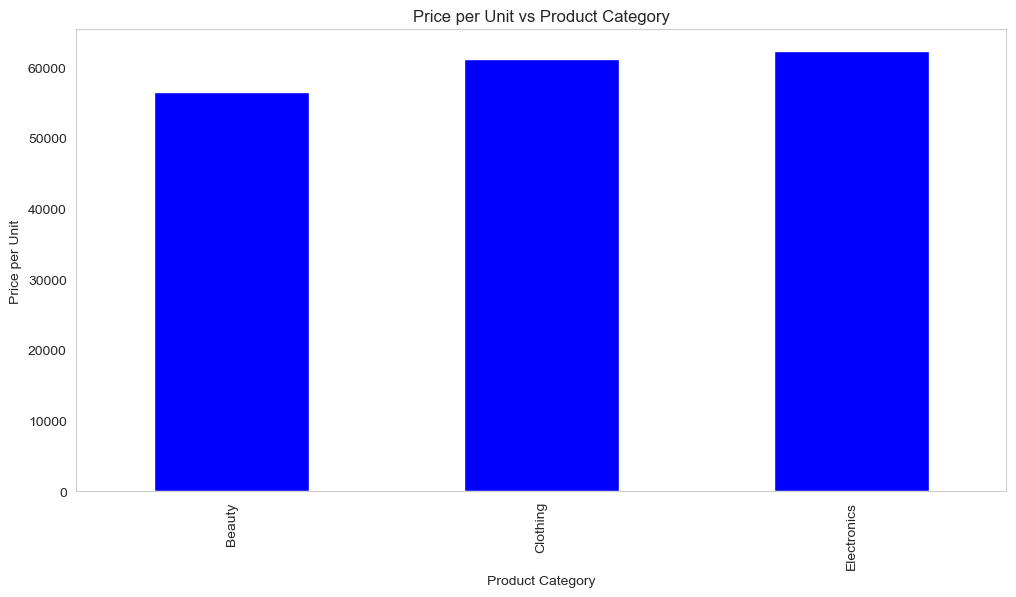

In [44]:
plt.figure(figsize=(12, 6))
product_price_to_Product_category = data.groupby("Product Category")["Price per Unit"].sum()
product_price_to_Product_category.plot(kind= "bar", color= "b", grid= False)

plt.title('Price per Unit vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')